<a href="https://colab.research.google.com/github/gabrielamedeirosds/Analise_de_voos/blob/main/Analise_de_voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando a base de dados

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import datetime, warnings, scipy 

from sklearn.model_selection import train_test_split


In [3]:
voos = pd.read_csv('flights.csv')
companhias = pd.read_csv('airlines.csv')

### Descrição das Variáveis 


* **YEAR:** Ano 
* **MONTH:** Mês 
* **DAY:** Dia
* **DAY_OF_WEEK:** Dia da semana
* **AIRLINE:** Airline Identifier
* **FLIGHT_NUMBER:** Flight Identifier
* **TAIL_NUMBER:** Aircraft Identifier
* **ORIGIN_AIRPORT:** Starting Airport
* **DESTINATION_AIRPORT:** Destination Airport
* **SCHEDULED_DEPARTURE :** Planned Departure Time
* **DEPARTURE_TIME:** Real Departure Time (in minutes)
* **DEPARTURE_DELAY:** Departure Delay (in minutes)
* **ARRIVAL_TIME:** Real arrival time 
* **ARRIVAL_DELAY:** Arrival Delay (in minutes)
* **DISTANCE:** distance (miles)





In [4]:
voos.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4.0,US,840.0,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4.0,DL,806.0,N3730B,SFO,MSP,25.0,...,610.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4.0,NK,612.0,N635NK,LAS,MSP,25.0,...,509.0,-17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4.0,US,2013.0,N584UW,LAX,CLT,30.0,...,753.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4.0,AA,1112.0,N3LAAA,SFO,DFW,30.0,...,532.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4.0,DL,1173.0,N826DN,LAS,ATL,30.0,...,656.0,-15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#Retirando valores NaN

voos = voos.dropna()

In [84]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'RESULTADO_ATRASO',
       'VOOS_TOTAIS', 'VOOS_ATRASADOS', 'TAXA_ATRASO'],
      dtype='object')

In [6]:
voos.shape

(103449, 31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a31dddbd0>,
      dtype=object)

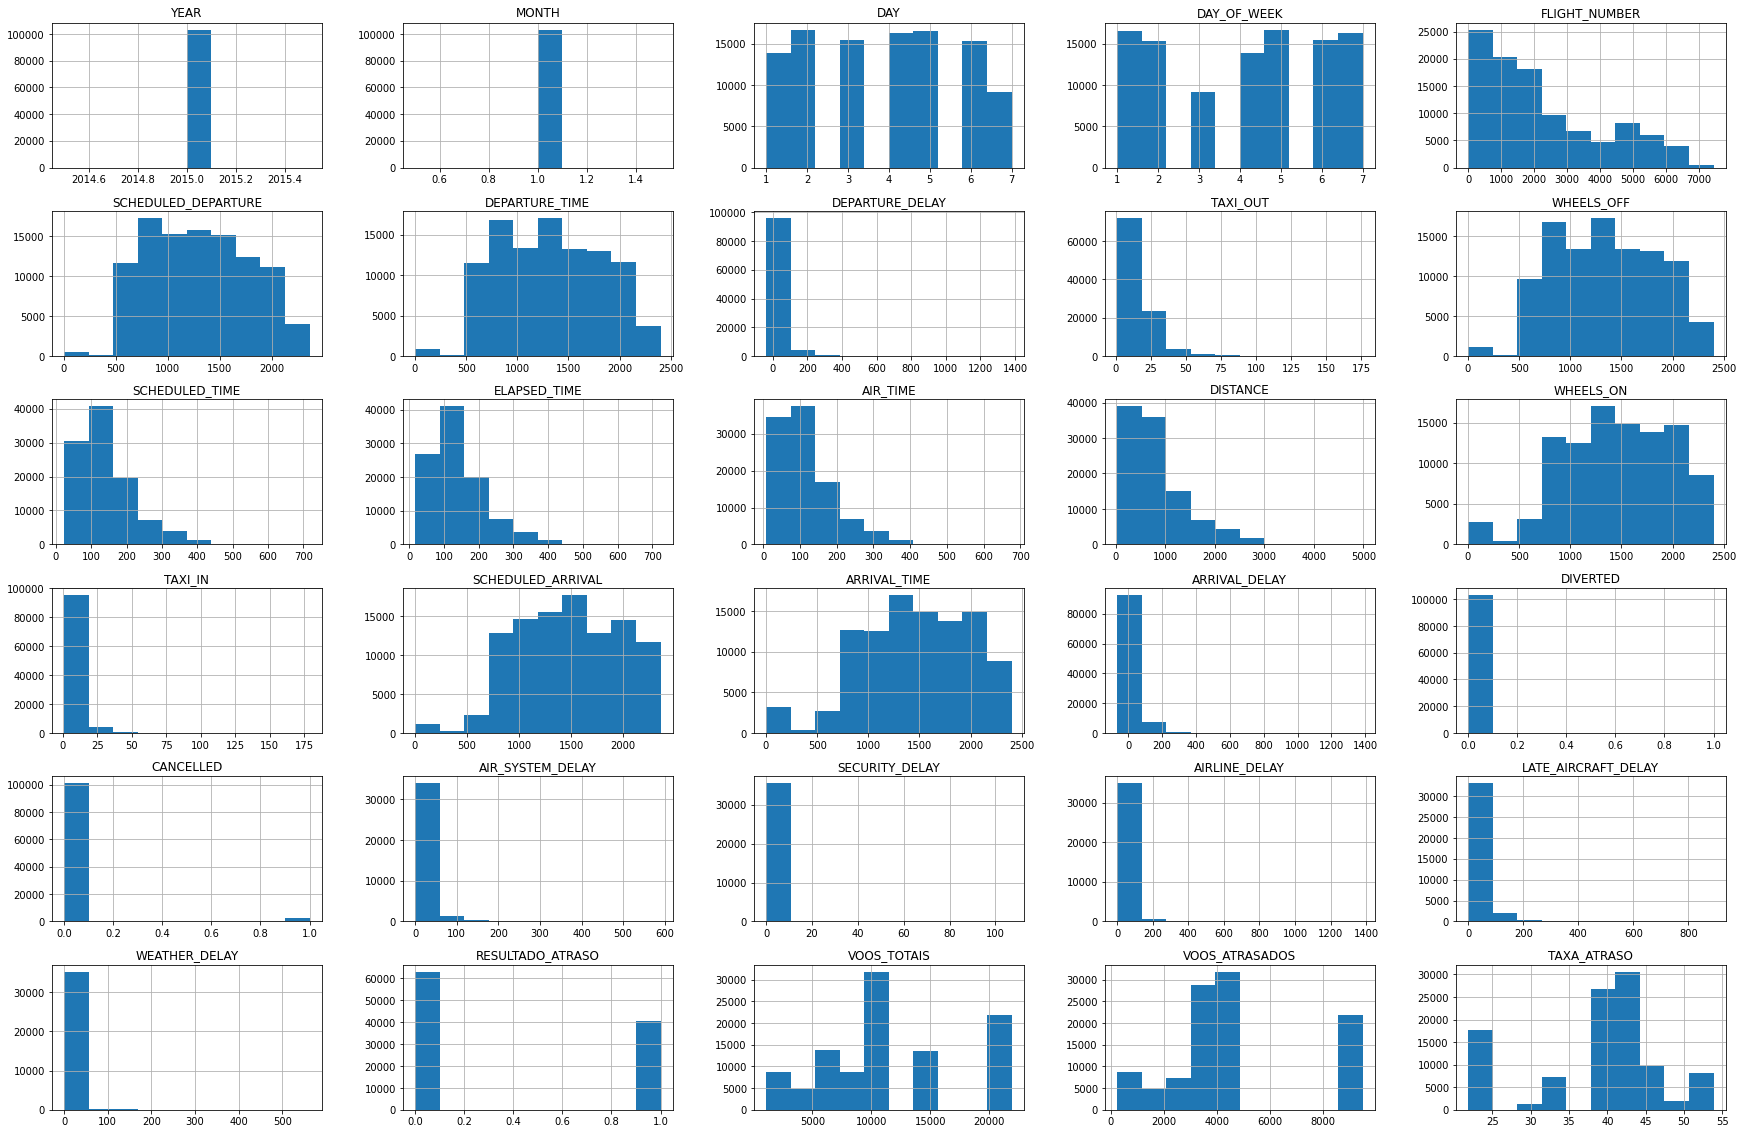

In [80]:
voos.hist(figsize=(30,20))

##Classificando Voos

In [8]:
#Categorizando voos atrasados e não atrasados

resultado_atraso = []

for i in voos['ARRIVAL_DELAY']:
    
  if i > 10:
    resultado_atraso.append(1)
  else:
    resultado_atraso.append(0) 


In [9]:
#Criando uma coluna para o resultado da checagem de atraso

voos['RESULTADO_ATRASO'] = resultado_atraso

In [10]:
#Numero de voos por companhia aerea

numeros_voos = voos['AIRLINE'].value_counts()

In [64]:
#Voos totais de cada Companhia Aerea

numeros_voos = numeros_voos.rename('VOOS_TOTAIS')
numeros_voos

WN    21885
DL    13622
EV    11211
OO    10847
AA     9772
UA     8717
US     7223
MQ     6527
B6     4825
AS     2915
NK     1859
F9     1602
HA     1375
VX     1068
Name: VOOS_TOTAIS, dtype: int64

In [65]:
#Setando o IATA code como índice

companhias = companhias.set_index(['IATA_CODE'], drop=True)
companhias.head()

,AIRLINE
IATA_CODE,
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways


In [13]:
companhias = pd.concat([companhias, numeros_voos], axis=1)
companhias.head()

,AIRLINE,VOOS_TOTAIS
UA,United Air Lines Inc.,8717
AA,American Airlines Inc.,9772
US,US Airways Inc.,7223
F9,Frontier Airlines Inc.,1602
B6,JetBlue Airways,4825


In [74]:
#Numero total de voos não atrasados e atrasados
#dist = distruibiicao

distInAtrasos = voos['RESULTADO_ATRASO'].value_counts()

In [69]:
#Porcentagem de voos atrasados, porcentagem de voos não atrasados

porcentagemAtraso = [100*x/distInAtrasos.sum() for x in distInAtrasos]
porcentagemAtraso


[60.9629959013224, 39.0370040986776]

In [70]:
#Variavel que armazena todos os voos atrasados 

voos_atrasados = voos[voos['RESULTADO_ATRASO']==1]

In [71]:
#Variavel que armazena o Numero total de voos atrasados por companhia aerea

voos_companhia = voos_atrasados['AIRLINE'].value_counts()

In [72]:
voos_companhia = voos_companhia.rename('VOOS_ATRASADOS')
voos_companhia

WN    9505
EV    4582
AA    4340
OO    4226
UA    3650
MQ    3512
DL    3212
US    2344
B6    1900
NK     932
F9     863
AS     671
HA     413
VX     233
Name: VOOS_ATRASADOS, dtype: int64

In [73]:
companhias = pd.concat([companhias, voos_companhia], axis=1)
companhias.head()

,AIRLINE,VOOS_ATRASADOS
UA,United Air Lines Inc.,3650
AA,American Airlines Inc.,4340
US,US Airways Inc.,2344
F9,Frontier Airlines Inc.,863
B6,JetBlue Airways,1900


In [19]:
#Relação Numero total de voos de cada companhia por numero total de voos atrasados de cada companhia
companhias['TAXA_ATRASO'] = companhias.apply(lambda row: (row['VOOS_ATRASADOS']/row['VOOS_TOTAIS'])*100, axis=1)

In [20]:
#Porcentagem de Atraso de cada companhia aérea
companhias

,AIRLINE,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
UA,United Air Lines Inc.,8717,3650,41.872204
AA,American Airlines Inc.,9772,4340,44.412607
US,US Airways Inc.,7223,2344,32.451890
F9,Frontier Airlines Inc.,1602,863,53.870162
B6,JetBlue Airways,4825,1900,39.378238
OO,Skywest Airlines Inc.,10847,4226,38.960081
AS,Alaska Airlines Inc.,2915,671,23.018868
NK,Spirit Air Lines,1859,932,50.134481
WN,Southwest Airlines Co.,21885,9505,43.431574
DL,Delta Air Lines Inc.,13622,3212,23.579504


No gráfico abaixo é possivel visualizar a relação entre os voos totais e os voos atrasados

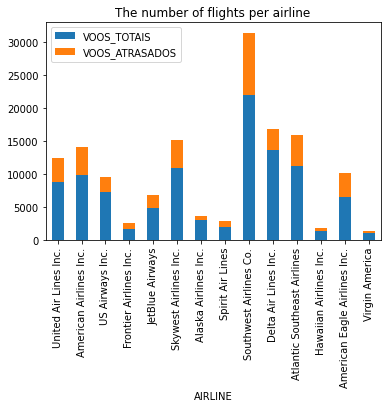

In [21]:
#Análise da relação entre os voos totais de cada empresa e os voos atrasados

companhias[['AIRLINE','VOOS_TOTAIS','VOOS_ATRASADOS']].plot.bar(x='AIRLINE', stacked=True, title='The number of flights per airline')

No gráfico abaixo está evidenciado o percentual de atraso por companhia aérea

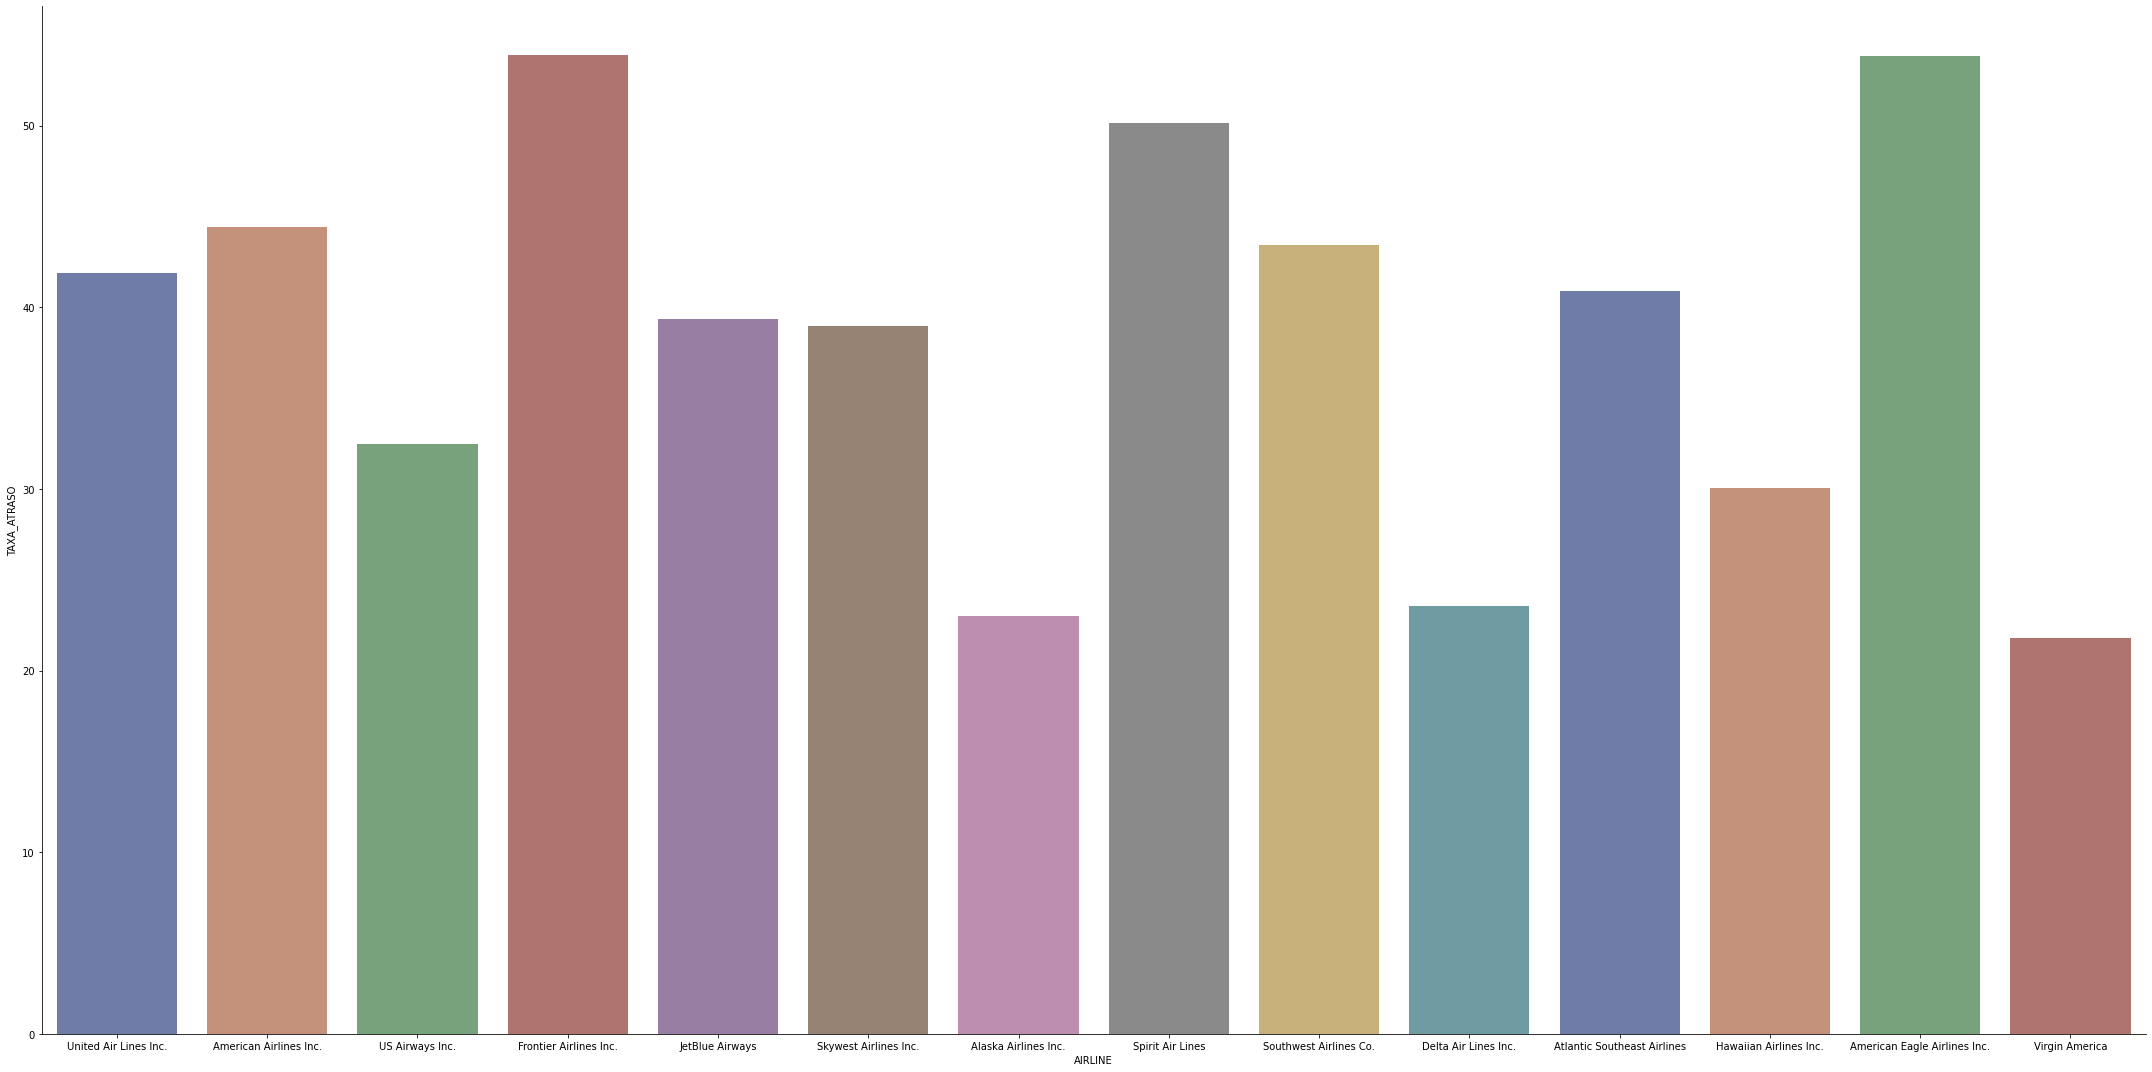

In [22]:
sns.catplot(
    data=companhias, kind="bar",
     x= "AIRLINE", y="TAXA_ATRASO",
    ci="sd", palette="dark", alpha=.6, height=15, aspect=2
)


##Matriz de Correlação 

é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre **-1** (associação negativa perfeita) e **1** (associação positiva perfeita).

In [23]:
voos.set_index('AIRLINE').head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO
AIRLINE,,,,,,,,,,,,,,,,,,,,,
AS,2015,1,1,4.0,98.0,N407AS,ANC,SEA,5.0,2354.0,...,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AA,2015,1,1,4.0,2336.0,N3KUAA,LAX,PBI,10.0,2.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
US,2015,1,1,4.0,840.0,N171US,SFO,CLT,20.0,18.0,...,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AA,2015,1,1,4.0,258.0,N3HYAA,LAX,MIA,20.0,15.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AS,2015,1,1,4.0,135.0,N527AS,SEA,ANC,25.0,24.0,...,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [24]:
voos = pd.merge(voos, companhias.drop(['AIRLINE'], axis=1), left_on='AIRLINE', right_index=True)

In [25]:
voos.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.500011,0.005816,-0.135154,-0.121217,0.052286,0.082499,-0.116337,...,-0.008020,0.091926,-0.009403,-0.006730,0.031980,0.062381,0.042145,0.020488,0.015690,-0.005412
DAY_OF_WEEK,NaN,NaN,-0.500011,1.000000,0.010198,0.047897,0.045915,0.055881,0.008709,0.044727,...,-0.005565,-0.019369,0.007842,0.005329,0.032812,-0.050894,0.088651,-0.002917,-0.004265,-0.006394
FLIGHT_NUMBER,NaN,NaN,0.005816,0.010198,1.000000,-0.003005,0.010140,0.035026,0.062140,0.016386,...,0.087970,-0.033938,-0.006582,0.022172,0.079958,0.003952,0.028981,0.064744,0.088911,0.161577
SCHEDULED_DEPARTURE,NaN,NaN,-0.135154,0.047897,-0.003005,1.000000,0.942961,0.172190,-0.080490,0.912024,...,-0.002541,-0.110701,-0.017824,-0.052860,0.183208,-0.041950,0.193401,0.001750,0.005165,0.009169
DEPARTURE_TIME,NaN,NaN,-0.121217,0.045915,0.010140,0.942961,1.000000,0.244157,-0.068894,0.966515,...,0.009276,-0.090981,-0.012787,-0.011387,0.245886,-0.043538,0.246146,0.014437,0.022228,0.028351
DEPARTURE_DELAY,NaN,NaN,0.052286,0.055881,0.035026,0.172190,0.244157,1.000000,0.063354,0.231866,...,0.029939,0.086710,0.007470,0.603454,0.607540,0.213680,0.525024,0.001890,0.037663,0.137651
TAXI_OUT,NaN,NaN,0.082499,0.008709,0.062140,-0.080490,-0.068894,0.063354,1.000000,-0.041377,...,0.010482,0.405846,-0.007677,-0.025189,-0.129004,0.117194,0.255909,-0.146742,-0.171720,-0.062391
WHEELS_OFF,NaN,NaN,-0.116337,0.044727,0.016386,0.912024,0.966515,0.231866,-0.041377,1.000000,...,0.000984,-0.083103,-0.013878,-0.015566,0.221849,-0.051988,0.248942,0.015990,0.022099,0.024475


In [26]:
voos.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
count,103448.0,103448.0,103448.000000,103448.000000,103448.000000,103448.000000,101094.000000,101094.000000,101020.000000,101020.000000,...,103448.000000,35636.000000,35636.000000,35636.000000,35636.000000,35636.000000,103448.000000,103448.000000,103448.000000,103448.000000
mean,2015.0,1.0,3.842781,4.070403,2242.663435,1305.208936,1325.314509,19.828605,17.123817,1347.628371,...,0.023674,14.032720,0.071248,17.729571,26.034151,2.800370,0.390370,11744.441207,4621.794302,39.037004
std,0.0,0.0,1.878837,2.072735,1819.040972,474.626892,495.544923,45.668806,10.704263,496.168228,...,0.152031,25.981297,1.690971,43.182842,42.573182,17.479402,0.487836,6083.101187,2744.676425,8.550312
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.000000,233.000000,21.816479
25%,2015.0,1.0,2.000000,2.000000,759.000000,910.000000,920.000000,-3.000000,11.000000,936.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7223.000000,3212.000000,32.451890
50%,2015.0,1.0,4.000000,4.000000,1694.000000,1300.000000,1316.000000,3.000000,14.000000,1329.000000,...,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000,0.000000,10847.000000,4226.000000,40.870574
75%,2015.0,1.0,5.000000,6.000000,3400.000000,1710.000000,1730.000000,25.000000,20.000000,1744.000000,...,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000,1.000000,13622.000000,4582.000000,43.431574
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000,1.000000,21885.000000,9505.000000,53.870162


In [27]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'RESULTADO_ATRASO',
       'VOOS_TOTAIS', 'VOOS_ATRASADOS', 'TAXA_ATRASO'],
      dtype='object')

##Gráficos de Dispersão 

<Figure size 720x720 with 0 Axes>

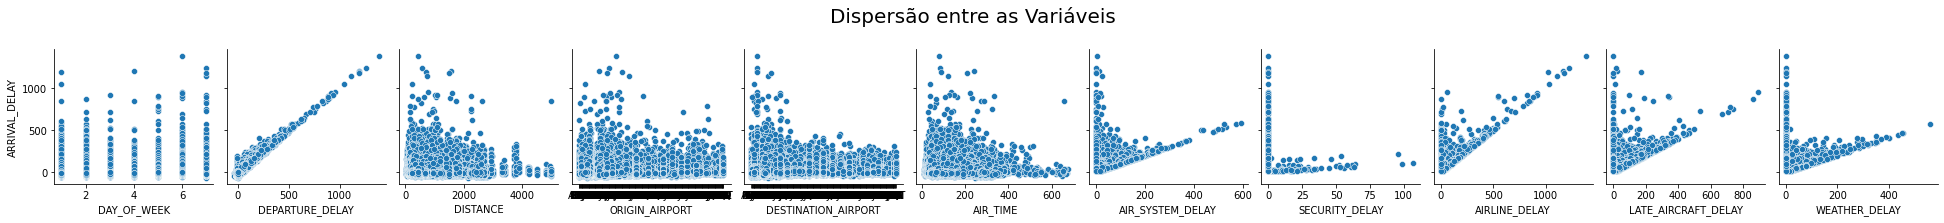

In [81]:
plt.figure(figsize = (10,10))
ax = sns.pairplot(voos, y_vars='ARRIVAL_DELAY',
                  x_vars=['DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DISTANCE', 'ORIGIN_AIRPORT',
                          'DESTINATION_AIRPORT', 'AIR_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                          'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]) #kind = reg - traça uma reta de regressao entre as duas variaveis
                  
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.20) 
ax

## Variavel Independente

In [75]:
# #Plotando a variavel independente

# fig, ax = plt.subplots(figsize = (20, 6)) #gera uma tupla com dois objetos

# ax.set_title('Atraso de Chegada', fontsize = 20)
# ax.set_ylabel('Minutos', fontsize = 15)
# ax.set_xlabel('Vôos', fontsize = 15)
# ax = voos['ARRIVAL_DELAY'].plot()




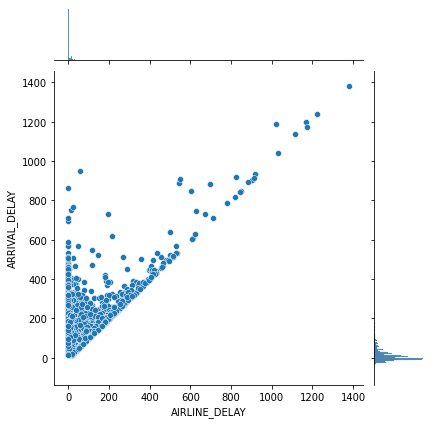

In [30]:
sns.jointplot(data = voos, x="AIRLINE_DELAY", y="ARRIVAL_DELAY")

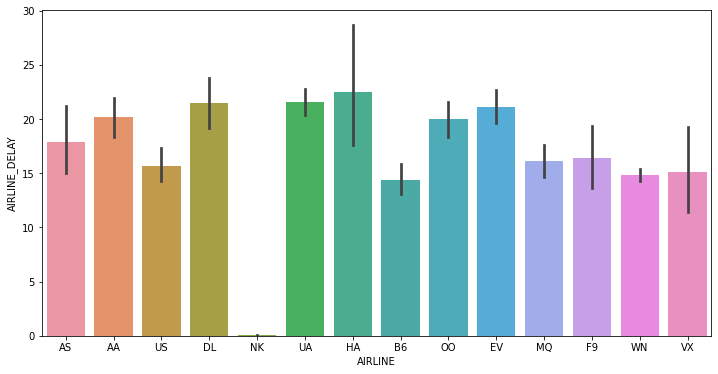

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(data = voos, y = 'AIRLINE_DELAY', x = 'AIRLINE', orient = 'v')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a3ea6d6d0>,
      dtype=object)

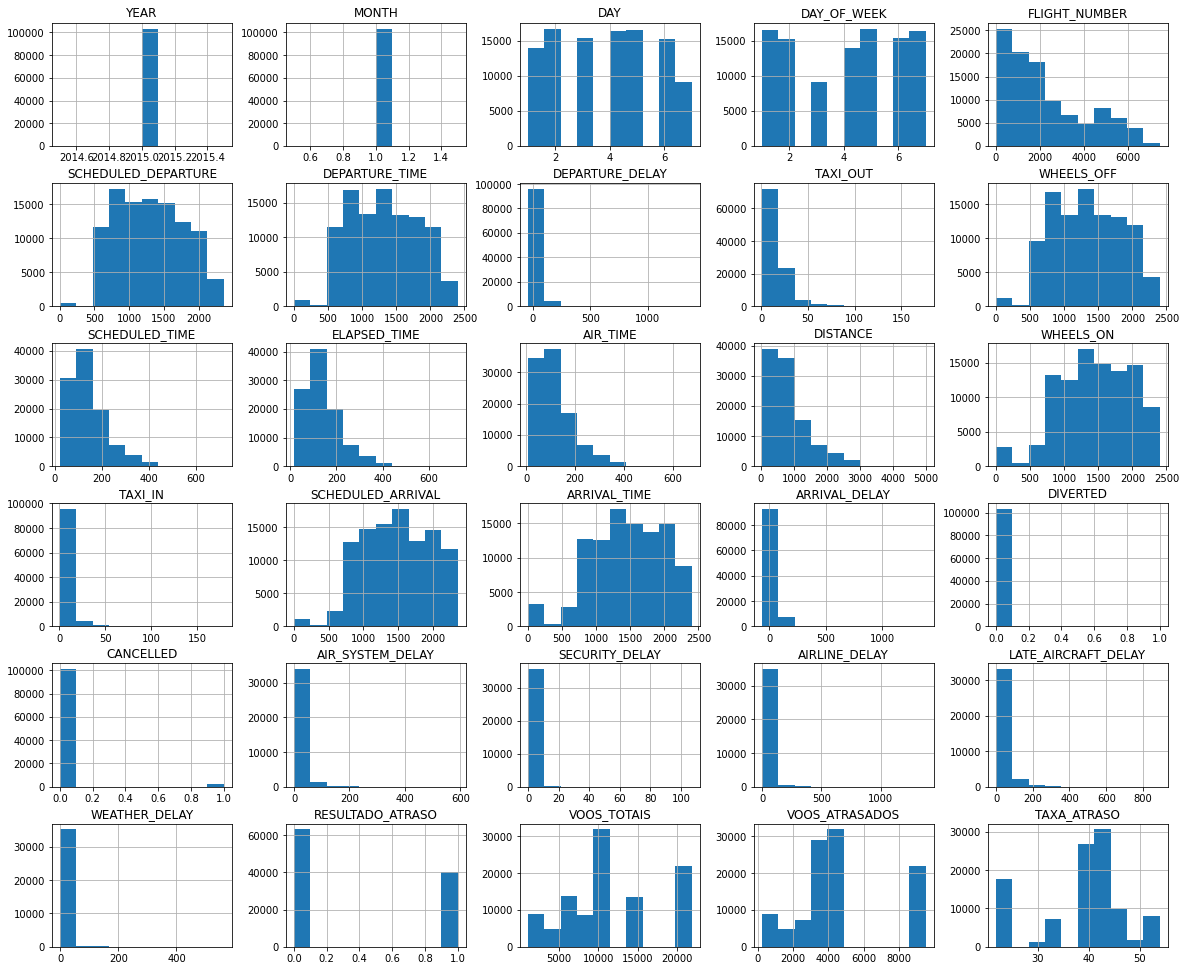

In [32]:
voos.hist(figsize = (20,17))

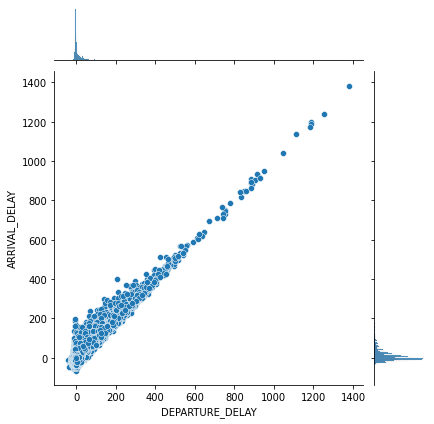

In [33]:
#Relação entre o horário de partida e atraso de chegada
x = 'DEPARTURE_DELAY'
y = 'ARRIVAL_DELAY'
sns.jointplot(data=voos, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY")

In [34]:
companhias = pd.read_csv('airlines.csv')

In [35]:
companhias.head(5)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


##Treinando Modelo Linear

In [36]:
#Importando train_test_split

from sklearn.model_selection import train_test_split

In [37]:
voos_modelo = voos[["AIRLINE",'ARRIVAL_DELAY', "DISTANCE", 'RESULTADO_ATRASO', 'TAXA_ATRASO', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]].dropna()

In [38]:
#Pegando uma amostra de 30% do dataset
voos_modelo_sample = voos_modelo[["AIRLINE",'ARRIVAL_DELAY' , "DISTANCE",'RESULTADO_ATRASO', 'TAXA_ATRASO', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]].sample(frac = 0.3, random_state=1)

In [39]:
one_hot = pd.get_dummies(voos_modelo_sample, columns=['AIRLINE', "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])

In [40]:
one_hot.head()

,ARRIVAL_DELAY,DISTANCE,RESULTADO_ATRASO,TAXA_ATRASO,DEPARTURE_DELAY,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
16871,16.0,728.0,1,32.451890,-1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28267,2.0,334.0,0,38.960081,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51265,13.0,229.0,1,40.870574,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43946,22.0,1390.0,1,43.431574,35.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22080,4.0,592.0,0,44.412607,17.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
one_hot.shape

(30230, 643)

In [42]:
#criando uma Series pra armazenar a variavel dependente (y)
y = voos_modelo_sample['ARRIVAL_DELAY']

In [43]:
#Criando um dataFrame para armazenar as variaveis explicativas (x)
# X = voos_modelo[['AIRLINE', "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT",'ARRIVAL_DELAY', 'RESULTADO_ATRASO', 'TAXA_ATRASO', "DISTANCE", 'DEPARTURE_DELAY']]

X = one_hot.drop('ARRIVAL_DELAY', axis=1)

In [44]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [46]:
modelo = LinearRegression()

In [47]:
#Método Fit para estimar o modelo linear utilizando os dados de treino
modelo.fit(X_train, y_train)

LinearRegression()

In [48]:
#Coeficiente de Determinação (R²): Medida de quanto a linha de regressão se ajusta aos dados

print("R² = {}".format(modelo.score(X_train, y_train)))

R² = 0.9316018617279973


In [49]:
y_predict = modelo.predict(x_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
y_test

35093     40.0
31355    -15.0
5672     -11.0
53131     13.0
37541    115.0
         ...  
36682    -16.0
80741    -21.0
56491     61.0
42988     71.0
76237     83.0
Name: ARRIVAL_DELAY, Length: 9069, dtype: float64

In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
mean_absolute_error(y_test, y_predict) 

497985.2270500317

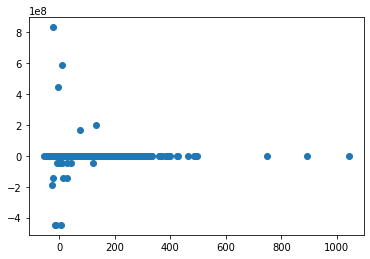

In [54]:
plt.scatter(y_test,y_predict)

In [55]:
y_train

52456    -4.0
14734   -11.0
15420   -10.0
15555    -6.0
26599   -21.0
         ... 
68298    19.0
76109    15.0
13428     0.0
24169     7.0
16232     6.0
Name: ARRIVAL_DELAY, Length: 21161, dtype: float64

In [56]:
y_predict

array([43.42838717, -6.24398637,  7.73019671, ..., 60.79234099,
       82.05227065, 34.67989206])